In [1]:
from basicgeo import P2, P3
from wingshape import WingShape
from parapolygraph import ParamPolyGraph
import numpy, math

wingshape = WingShape("P7-211221-XYZ geometry.csv")        
print("Parametrization in uv: ", wingshape.urange, wingshape.vrange)
parapolygraph = ParamPolyGraph(wingshape, "test7.json", splineweight=0.8, legsampleleng=0.05)


Parametrization in uv:  (0, 6.11206792886613) (-1.377293405726668, 1.377293405726668)


In [2]:
parapolygraph.splineinterplegsdata()
polysnodes = parapolygraph.derivepolygons()


In [42]:
polynodes = polysnodes[5]
polyloop = parapolygraph.splinedpolypoints(polynodes)


In [43]:
import numpy
meshsize = 0.05
urg, vrg = wingshape.urange, wingshape.vrange
ulines = numpy.linspace(urg[0], urg[1], int((urg[1]-urg[0])/meshsize+1))
vlines = numpy.linspace(vrg[0], vrg[1], int((vrg[1]-vrg[0])/meshsize+1))

upolyloop = polyloop+[polyloop[0]]
vpolyloop = [ P2(p.v, p.u)  for p in upolyloop ]



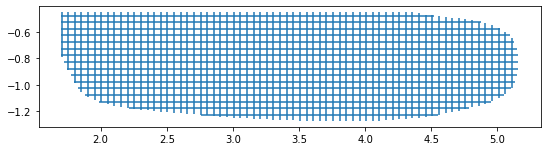

In [44]:
%matplotlib inline 

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

def usegcuts(u, upolyloop, reflected):
    prev = upolyloop[-1]
    ucuts = [ ]
    for i in range(len(upolyloop)):
        p = upolyloop[i]
        if (p.u < u) != (prev.u < u):
            lam = (u - prev.u)/(p.u - prev.u)
            v = prev.v*(1 - lam) + p.v*lam
            ucuts.append((v, not (p.u < u)))
        prev = p
    ucuts.sort()
    assert (len(ucuts)%2) == 0
    vsegs = [ ]
    for i in range(0, len(ucuts), 2):
        assert (ucuts[i][1] == reflected) and (ucuts[i+1][1] != reflected) 
        vsegs.append((ucuts[i][0], ucuts[i+1][0]))
    return vsegs


lc = [ ]
for u in ulines:
    for vseg in usegcuts(u, upolyloop, False):
        lc.append([(u, vseg[0]), (u, vseg[1])])
for v in vlines:
    for useg in usegcuts(v, vpolyloop, True):
        lc.append([(useg[0], v), (useg[1], v)])

fig = plt.figure(figsize=(9,7))
s = fig.gca()
s.add_collection(LineCollection(lc))
s.set_aspect("equal")
s.autoscale()
